In [1]:
from utils import plot_similarity_histogram, get_tanimoto_similarity_triangle, plot_histogram_with_two_y_axes, get_actives_inactives_similarity_flat, scaffold_dataset_splitter
import pandas as pd

2024-09-24 14:24:34.809671: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 14:24:34.864841: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 14:24:34.864882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 14:24:34.866494: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 14:24:34.875603: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 14:24:34.876328: I tensorflow/core/platform/cpu_feature_guard.cc:1

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


# Dataset filtrado general

In [2]:
df = pd.read_pickle("../data/raw/data_chembl34_filtrada_02_09_24.pkl")

# Armado de dataset


In [3]:
target = "CHEMBL4657"
df_target = df[df.target == target]
df_target

,molregno,comp_id,tid,assay_id,target,relation,bioactivity,units,type,potential_duplicate,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,np_likeness_score,sequence,sequence_organism,binary_bioactivity
12969,633480,CHEMBL1082347,20151,635726,CHEMBL4657,=,235.0,nM,IC50,0,...,0.85,291.1947,C16H26ClN3O2,5.0,1.0,0.0,-0.08,MWKRSEQMKIKSGKCNMAAAMETEQLGVEIFETADCEENIESQDRP...,Homo sapiens,1
12972,633481,CHEMBL1082348,20151,635726,CHEMBL4657,=,23.0,nM,IC50,0,...,0.85,291.1947,C16H26ClN3O2,5.0,1.0,0.0,-0.08,MWKRSEQMKIKSGKCNMAAAMETEQLGVEIFETADCEENIESQDRP...,Homo sapiens,1
12976,633550,CHEMBL1082350,20151,635726,CHEMBL4657,=,1430.0,nM,IC50,0,...,0.79,319.1896,C17H26ClN3O3,6.0,1.0,0.0,0.26,MWKRSEQMKIKSGKCNMAAAMETEQLGVEIFETADCEENIESQDRP...,Homo sapiens,1
13113,632662,CHEMBL1082462,20151,635365,CHEMBL4657,>,100000.0,nM,IC50,0,...,0.81,324.1962,C16H25FN4O2,6.0,1.0,0.0,-0.80,MWKRSEQMKIKSGKCNMAAAMETEQLGVEIFETADCEENIESQDRP...,Homo sapiens,0
13116,632663,CHEMBL1082463,20151,635365,CHEMBL4657,>,20000.0,nM,IC50,0,...,0.72,340.1911,C16H25FN4O3,7.0,2.0,0.0,-0.71,MWKRSEQMKIKSGKCNMAAAMETEQLGVEIFETADCEENIESQDRP...,Homo sapiens,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280992,153723,CHEMBL95089,20151,418292,CHEMBL4657,=,1218.0,nM,Ki,0,...,0.77,221.1528,C12H19N3O,4.0,1.0,0.0,-0.79,MWKRSEQMKIKSGKCNMAAAMETEQLGVEIFETADCEENIESQDRP...,Homo sapiens,1
1282786,155408,CHEMBL97025,20151,492001,CHEMBL4657,>,1000000.0,nM,IC50,0,...,0.52,128.0950,C6H12N2O,3.0,2.0,0.0,-1.06,MWKRSEQMKIKSGKCNMAAAMETEQLGVEIFETADCEENIESQDRP...,Homo sapiens,0
1284186,156652,CHEMBL98408,20151,304640,CHEMBL4657,=,2226.5,nM,IC50,1,...,0.74,202.1140,C9H18N2OS,3.0,2.0,0.0,-0.66,MWKRSEQMKIKSGKCNMAAAMETEQLGVEIFETADCEENIESQDRP...,Homo sapiens,1
1284454,162220,CHEMBL98762,20151,657414,CHEMBL4657,>,100000.0,nM,IC50,0,...,0.79,309.1608,C16H24ClN3O,4.0,3.0,0.0,-1.12,MWKRSEQMKIKSGKCNMAAAMETEQLGVEIFETADCEENIESQDRP...,Homo sapiens,0


In [4]:
df_target[df_target.duplicated(subset="comp_id")]

,molregno,comp_id,tid,assay_id,target,relation,bioactivity,units,type,potential_duplicate,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,np_likeness_score,sequence,sequence_organism,binary_bioactivity


# Estudio de diversidad quimica de compuestos

100%|██████████| 1603/1603 [00:23<00:00, 67.73it/s]


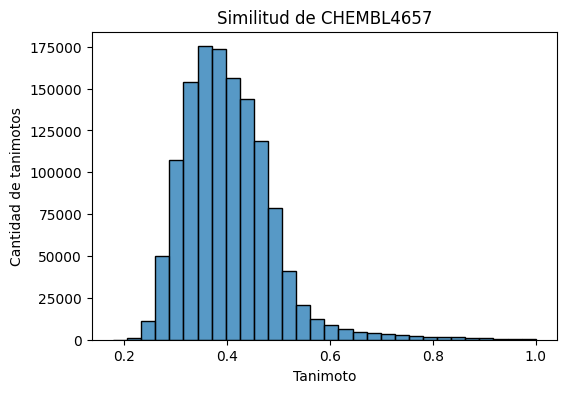

In [5]:
similarity_triangle = get_tanimoto_similarity_triangle(df_target)
plot_similarity_histogram(similarity_triangle,target)

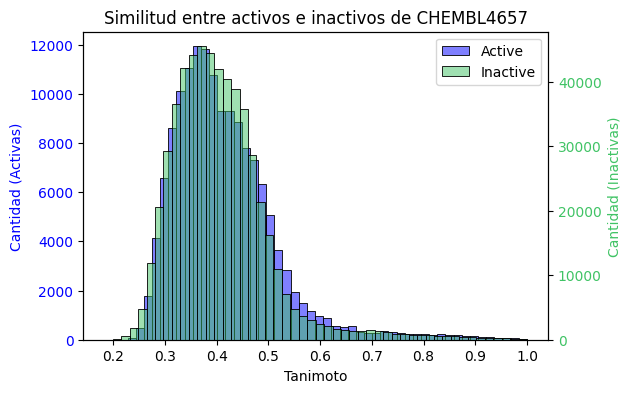

In [6]:
actives, inactives = get_actives_inactives_similarity_flat(df_target, similarity_triangle)

plot_histogram_with_two_y_axes(actives,inactives,target)

splitting

In [7]:
dataset_splited = scaffold_dataset_splitter(df_target)

dataset_splited.to_csv(f"../data/processed/{target}_chemblv34.csv",index=False)